# 1. INTRODUCTION

FIFA is a football based game developed by game giants EA Sports. FIFA 19 contains a rich dataset with plenty of attributes covering all aspects of a real-life footballer in an attempt to immitate him as much as possible in the virtual world. This rich dataset provides a huge oppurtunity for us, data scientists or data analysts to analyze and come up with visualizations and patterns. In this paper, I will try to cover the following:

   - The dataset distribution based on player nationality, player overall rating, age vs overall rating, player valuation and so on.<br>
   - The patterns in the dataset.<br>
   - Suggestions for playing Manager Mode.<br>
   - Building Models like Random Forest Regressor ,Linear Regressor , classification etc.<br>
   - Predicting similar players based on their attributes.<br>
   
To begin with, we import the Python packages used in our analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs
from matplotlib.pyplot import figure
import operator
import re
import seaborn as sns
from math import pi

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("./Data"))

# Any results you write to the current directory are saved as output.

['data.csv']


After importing the requisite packages, we load the dataset and familiarize ourselves with it by having a look at the first five records in the dataset.

In [2]:
players_df = pd.read_csv("./Data/data.csv")
players_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Hence we observe that the dataset contains 18207 entries about details of players , each having 89 characteristics.There are 38 floating point datatypes, 6 integer type datatype and 45 object type datatype.

# 2. EXPLORATORY DATA  ANALYSIS

First we check the shape of the dataset

In [4]:
# Dimension of the datatset
print("Dimension of the dataset is: ",players_df.shape)

Dimension of the dataset is:  (18207, 89)


Hence we saw that our Dataset has the dimension 18207 rows X 89 columnns.Now Let's see the NULL values for the respective attributes.

In [5]:
# Check the missing values in the column
players_df.isnull().sum().sort_values(ascending=False)

Loaned From             16943
LWB                      2085
LM                       2085
CB                       2085
LCB                      2085
LB                       2085
RWB                      2085
RDM                      2085
CDM                      2085
LDM                      2085
RM                       2085
RCM                      2085
CM                       2085
LCM                      2085
RAM                      2085
RB                       2085
CAM                      2085
LAM                      2085
RW                       2085
RF                       2085
CF                       2085
LF                       2085
LW                       2085
RS                       2085
ST                       2085
LS                       2085
RCB                      2085
Release Clause           1564
Joined                   1553
Contract Valid Until      289
                        ...  
Positioning                48
FKAccuracy                 48
LongPassin

We notice that there are a number of fields which are of no use in our analysis. These fields include Unnamed:0, ID, Photo, Club Logo and so on. These fields need to be dropped. There are also some fields like Value, Wage which needs modification so as to aid our analysis process.

In [6]:
players_df = players_df.drop(columns=['ID','Photo','Club Logo','Body Type','Real Face','Loaned From','LS','ST',
                                      'RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM',
                                      'LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'])
players_df = players_df.drop(players_df.columns[0], axis=1)
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-nul

After removing the unrequired columns, we use the info() to find out the number of values under every column. Our dataset contains a total of 18207 records but we notice that some columns like Club, Preferred Foot, International Reputation and so on contains less than 18207 records. This means a number of these columns are filled with None values. Hence, we need to remove these records so that they do not hamper our visualization and prediction process.

In [7]:
players_df = players_df.dropna(axis = 0, how = 'any')
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 56 columns):
Name                        16643 non-null object
Age                         16643 non-null int64
Nationality                 16643 non-null object
Flag                        16643 non-null object
Overall                     16643 non-null int64
Potential                   16643 non-null int64
Club                        16643 non-null object
Value                       16643 non-null object
Wage                        16643 non-null object
Special                     16643 non-null int64
Preferred Foot              16643 non-null object
International Reputation    16643 non-null float64
Weak Foot                   16643 non-null float64
Skill Moves                 16643 non-null float64
Work Rate                   16643 non-null object
Position                    16643 non-null object
Jersey Number               16643 non-null float64
Joined                      16643 non-nul

We can see that all the columns have the same number of records. Hence, we can start modifying some of the values in order to aid our visualizing process. One such column in the Value column. The Value column lists certain player valuations in thousands and some in millions. This poses two problems. First of all, we need to convert the values to a numeric type since we cannot create the required visualizations without doing so. Secondly, we need to modify the values in terms of a single unit i.e. either thousands or in millions. In the following code, we modify the Value column values to a numeric type in terms of millions. This is done with the help of regular expressions and some simple mathematical calculations. We also convert the Wages field values to numeric types represented in terms of thousands.

In [8]:
def findValue(value):
    splitted = re.split('(\d+\.\d+|\d+)([A-Z])',value)
    try:
        if splitted[2] is 'M':
            return pd.to_numeric(splitted[1])
        else:
            return pd.to_numeric(splitted[1])/1000
    except IndexError:
        return 0

def findWages(value):
    return re.findall('\d+\.\d+|\d+',value)[0]

def findAttribute(value):
    return re.findall('\d+',value)
            
players_df['Value'] = players_df['Value'].apply(findValue)
players_df['Wage'] = players_df['Wage'].apply(findWages)
players_df['Value'] = pd.to_numeric(players_df['Value'])
players_df['Wage'] = pd.to_numeric(players_df['Wage'])
players_df

,Name,Age,Nationality,Flag,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,110.50,565,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,77.00,405,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,118.50,290,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,72.00,260,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,102.00,355,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,93.00,340,2142,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,L. Modrić,32,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,67.00,420,2280,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,L. Suárez,31,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,80.00,455,2346,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,Sergio Ramos,32,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,51.00,380,2201,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,J. Oblak,25,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,68.00,94,1331,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


## 2.a. DATASET DISTRIBUTION

I will begin my analysis of the dataset by having a look at the distribution of the dataset. Football is a multi-national sport and is played in over 200 countries. So, naturally a large number of countries are represented in our FIFA 19 Player Dataset.First, we find out the Count of Players by top 10 nationality. Then, We find out the countries which have the most number of players in the game.

In [9]:
players_df['Nationality'].value_counts()[:10]

England        1475
Germany        1151
Spain           974
France          853
Argentina       833
Brazil          788
Italy           579
Colombia        570
Japan           455
Netherlands     426
Name: Nationality, dtype: int64

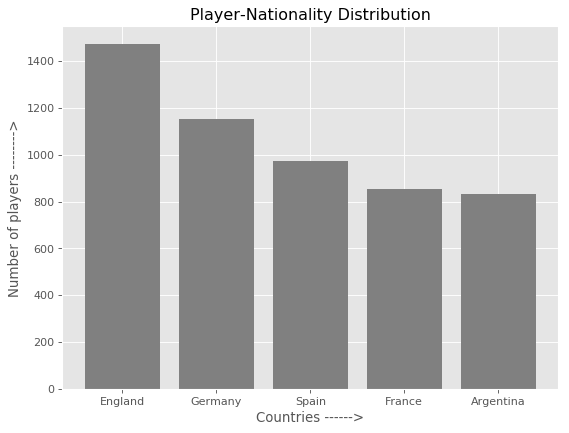

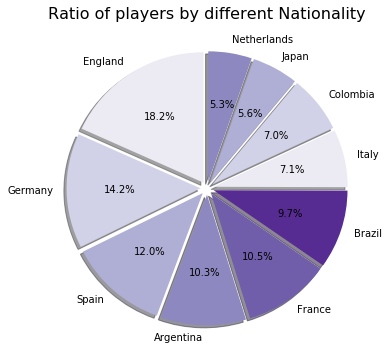

In [10]:
countries = list(players_df.groupby(['Nationality']).groups.keys())
temp = players_df.groupby(['Nationality']).count()
temp = list(temp.loc[:,"Name"])
countries_dict = dict(zip(countries,temp))
sorted_countries = sorted(countries_dict.items(), key=operator.itemgetter(1),reverse=True)
countries_dict = dict(sorted_countries)
countries_dict = {k: countries_dict[k] for k in list(countries_dict)[:5]}
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.bar(countries_dict.keys(), countries_dict.values(),color="grey")
    plt.xlabel('Countries ------>')
    plt.ylabel('Number of players -------->')
    plt.title('Player-Nationality Distribution')
    plt.show()
    
# Data to plot
England = len(players_df[players_df['Nationality'] == 'England'])
Germany = len(players_df[players_df['Nationality'] == 'Germany'])
Spain = len(players_df[players_df['Nationality'] == 'Spain'])
Argentina = len(players_df[players_df['Nationality'] == 'Argentina'])
France = len(players_df[players_df['Nationality'] == 'France'])
Brazil = len(players_df[players_df['Nationality'] == 'Brazil'])
Italy = len(players_df[players_df['Nationality'] == 'Italy'])
Colombia = len(players_df[players_df['Nationality'] == 'Colombia'])
Japan = len(players_df[players_df['Nationality'] == 'Japan'])
Netherlands = len(players_df[players_df['Nationality'] == 'Netherlands'])

labels = 'England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands'
sizes = [England,Germany,Spain,Argentina,France,Brazil,Italy,Colombia,Japan,Netherlands]
plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)
sns.set_context("paper", font_scale=1.2)
plt.title('Ratio of players by different Nationality', fontsize=16)
plt.show()

We notice from the bar graph that England is represented the most by over 1600 players in the dataset, followed by Germany, Spain, Argentina and France. In the pie Chart distribution , more than 50% of players come from popular countries like England, Germany, Spain, Argentina and France. This could be explained by the popularity and sizes of domestic leagues within these nations. There are some causes behind this and one of them is FIFA 19 contains upto three divisions of English football. Hence, a large number of English players find their place in the game. Similarly, two divisions of the German league and the Spanish league are also present in the game and hence these players are found in good numbers. 

Let us now have a look at how player ratings are distributed in FIFA 19.

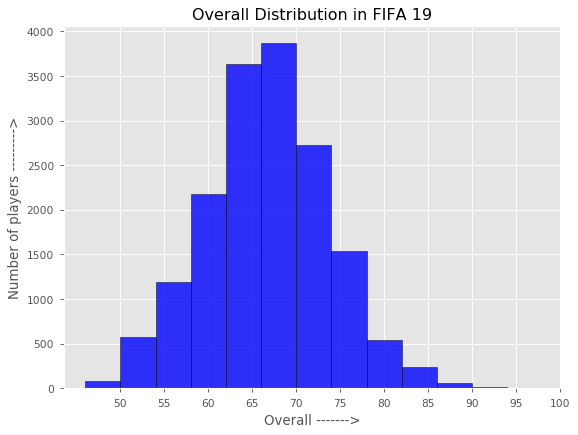

In [11]:
overall = list(players_df.loc[:,"Overall"])
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.hist(overall, bins=12, ec='black', alpha=0.8, color='blue')
    plt.xlabel("Overall ------->")
    plt.ylabel("Number of players --------->")
    plt.xticks([50,55,60,65,70,75,80,85,90,95,100])
    plt.title("Overall Distribution in FIFA 19")
    plt.show()

FIFA 19 has a fairly pyramidal distribution of overall with the highest number of players being concentrated in the range between 65 and 70. It is not surprising that only a few players have an overall rating of more than 90. These include the very best footballers of the planet including the likes of Cristiano Ronaldo and Lionel Messi.

Now, Let us see the Count of players by position & Distribution of players by overall

Text(0.5,1,'Distribution of players by Overall')

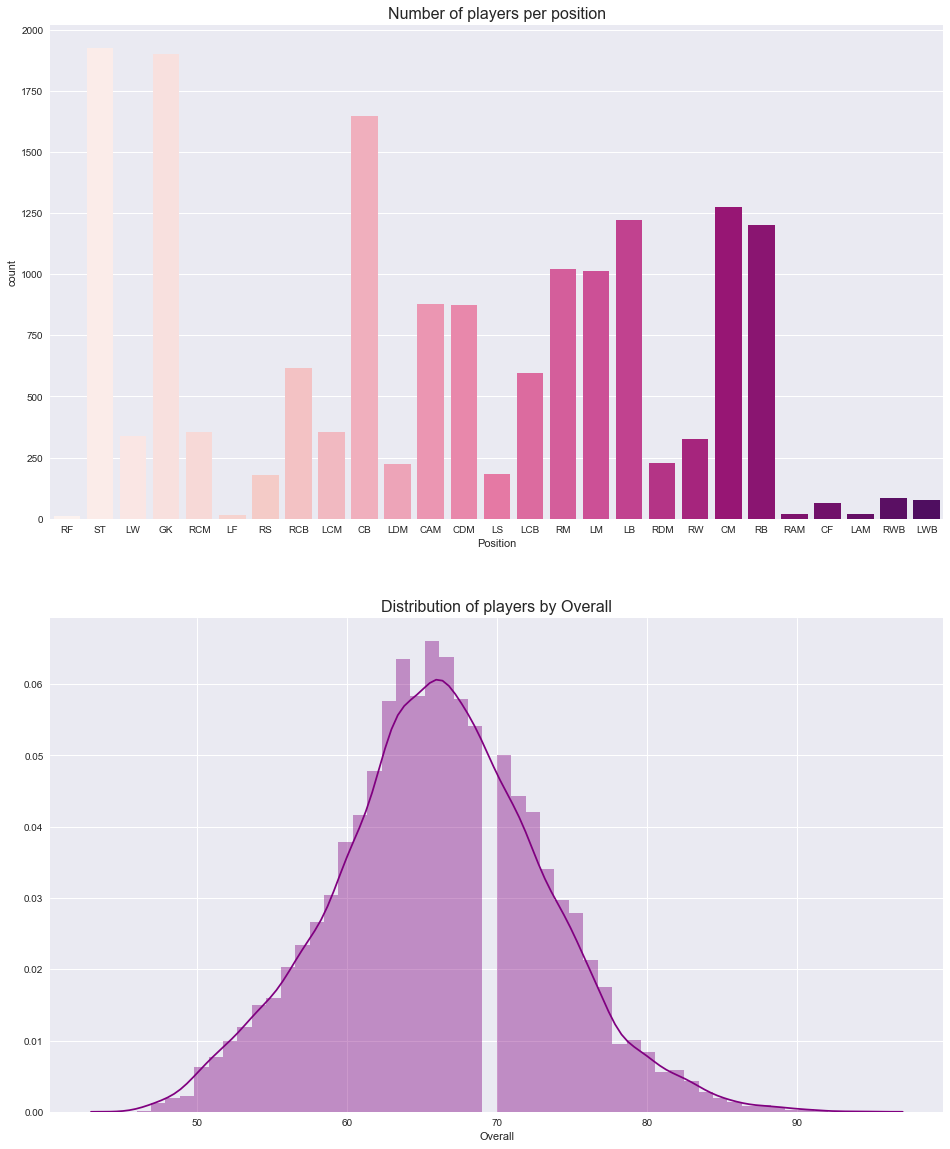

In [12]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(players_df['Position'], palette="RdPu", ax=axs[0])
axs[0].set_title('Number of players per position', fontsize=16)
sns.distplot(players_df['Overall'],color="Purple", ax=axs[1])
axs[1].set_title('Distribution of players by Overall', fontsize=16)

Let us now have a look at how the overall rating of footballers ranges in accordance to their playing position. We will group the positions into three main positions of a football i.e. Defender, Midfielder and Forward, and include goalkeepers inside the defenders grouping.

Text(0.5,1,'Range of Forward Overalls')

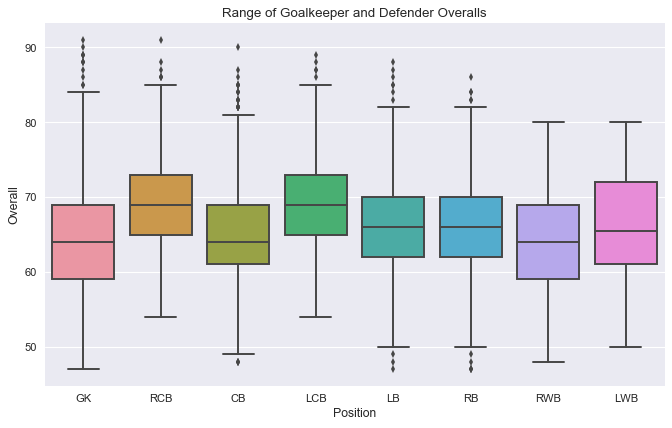

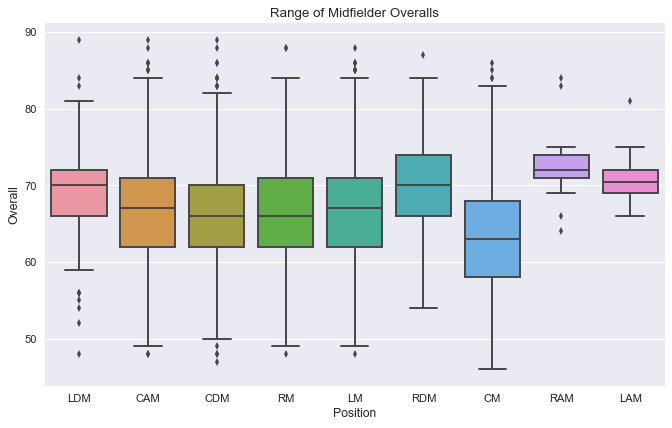

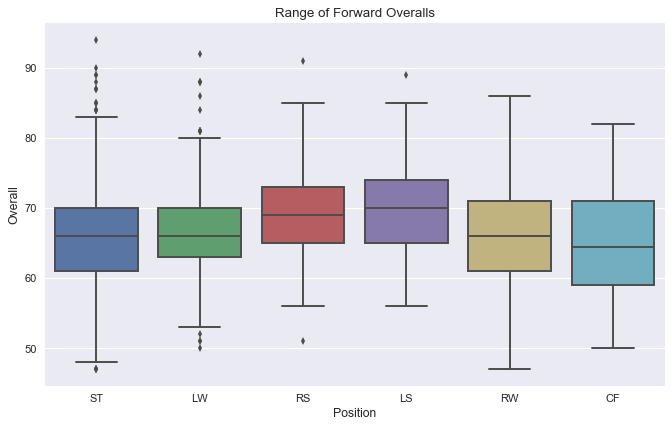

In [13]:
gk_defenders = players_df.loc[players_df['Position'].isin(['GK','RWB','RB','RCB','CB','LCB','LB','LWB'])]
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x= gk_defenders['Position'], y=gk_defenders['Overall']).set_title('Range of Goalkeeper and Defender Overalls')
midfielders = players_df.loc[players_df['Position'].isin(['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=midfielders['Position'],y=midfielders['Overall']).set_title('Range of Midfielder Overalls')
forwards = players_df.loc[players_df['Position'].isin(['RW','CF','LW','ST','RS','LS'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=forwards['Position'], y=forwards['Overall']).set_title('Range of Forward Overalls')

Amongst the defenders, certain positions like CB and LB has a large amount of outliers which indicate a large range in overall values. Even goalkeepers have a large range of such values. Among the midfielders, positions like CDM have a good amount of outliers. LDM have a small interquartile range but have a large amount of outliers on the minimum side. ST also has a large amount of outliers on the maximum side. Certain positions like RAM and LAM have a small interquartile distance with low amount of outliers. This is primarily due to lack of records for such positions.

We will now have a look at whether the position of a footballer has an adverse impact on his ability.

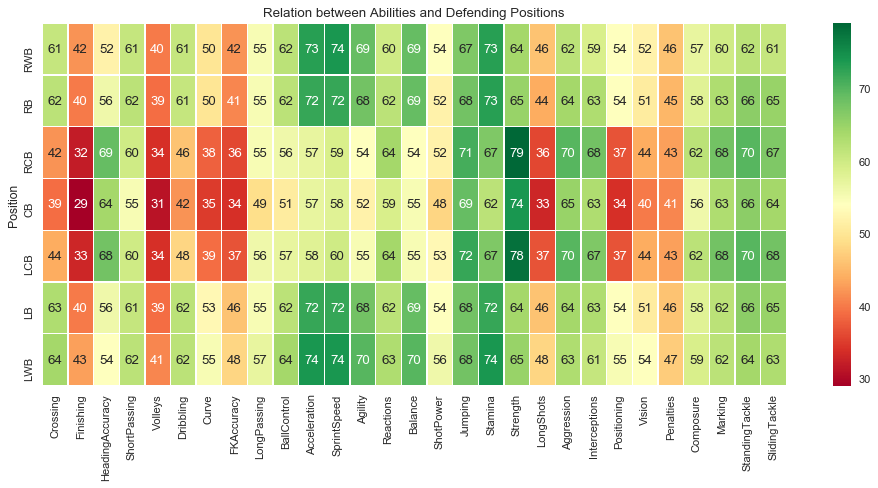

In [14]:
heatmap_df = players_df.filter(['Position','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
                               'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
                                'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
                               'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
                               'SlidingTackle']).groupby('Position').mean()
heatmap_df_defenders = heatmap_df.loc[['RWB','RB','RCB','CB','LCB','LB','LWB']]
heatmap_df_defenders = heatmap_df_defenders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_defenders,annot=heatmap_df_defenders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Defending Positions')
plt.show()

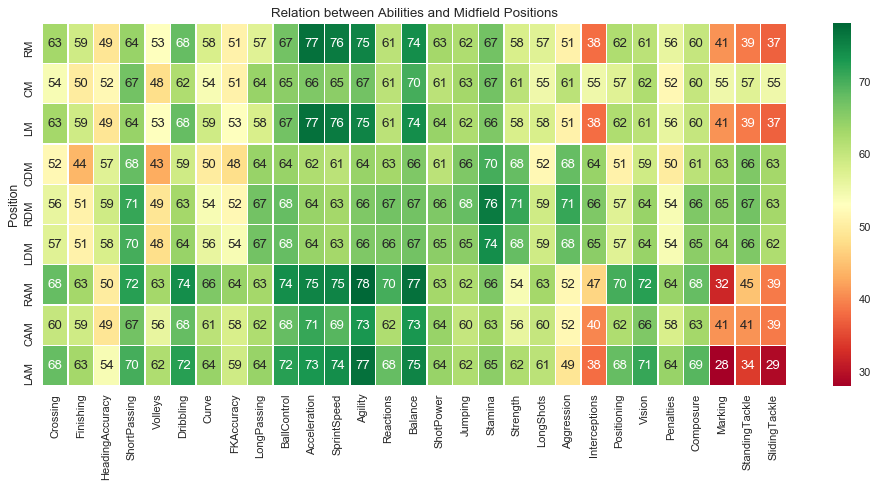

In [15]:
heatmap_df_midfielders = heatmap_df.loc[['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM']]
heatmap_df_midfielders = heatmap_df_midfielders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_midfielders,annot=heatmap_df_midfielders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Midfield Positions')
plt.show()

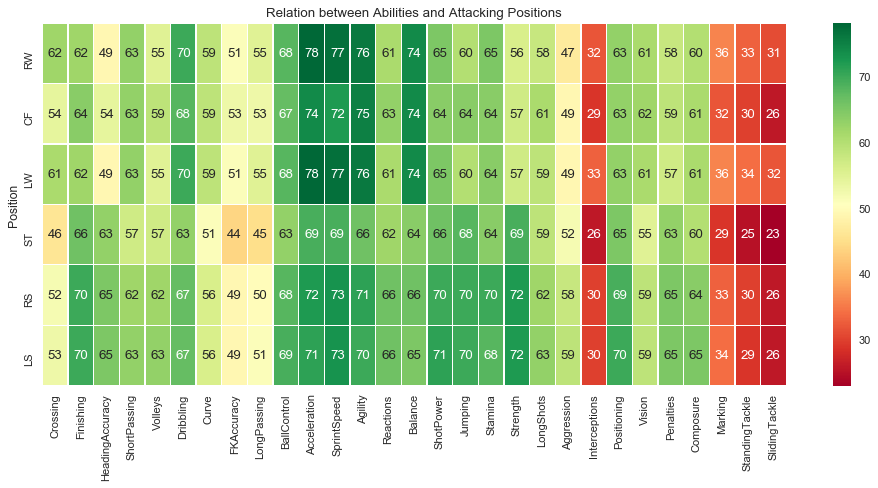

In [16]:
heatmap_df_attackers = heatmap_df.loc[['RW','CF','LW','ST','RS','LS']]
heatmap_df_attackers = heatmap_df_attackers.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_attackers,annot=heatmap_df_attackers,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Attacking Positions')
plt.show()

A correlation heatmap is a great visualization to depict the dependency between different features in a dataframe. 
Amongst the defending positions, we notice that attributes like Sprint Speed, Acceleration and Stamina are the differentiators amongst players in RWB, RB, LWB and LB positions. This is expected since these players have to run across the flanks in order to help their side in both defence and attack.
Some parameters like Balance and Stamina are maximum in players playing in central midfield positions. Attacking players like Forwards and Strikers have good Acceleration, Stamina, Sprint Speed, Strength and Shot Power among others. It is natural that these players are poor in defensive attributes like Marking, Standing Tackle and Sliding Tackle.

## 2.b. Youth prospects with high potential growth

Young players are the most crucial asset for any club for the future. Let us start observing the trends by first start to create the a new dataset on young players.

In [17]:
#Create a dataset for young prospects
youth_special = players_df[(players_df['Overall']>75) & (players_df['Potential'] - players_df['Overall']>=10)].sort_values(by='Overall',ascending=False)
cols = ['Name','Club','Age','Overall','Potential','Position','Value']
youth_special[cols]

,Name,Club,Age,Overall,Potential,Position,Value
229,G. Donnarumma,Milan,19,82,93,GK,29.0
415,H. Aouar,Olympique Lyonnais,20,80,90,LM,23.5
734,A. Lafont,Fiorentina,19,78,90,GK,14.0
735,T. Alexander-Arnold,Liverpool,19,78,88,RB,14.0
744,D. Calabria,Milan,21,78,88,RB,14.5
755,J. Gomez,Liverpool,21,78,88,CB,14.5
1143,Vinícius Júnior,Real Madrid,17,77,92,LW,17.5
1172,N. Barella,Cagliari,21,77,89,RCM,15.5
1156,A. Diawara,Napoli,20,77,87,CM,14.0
1149,R. Bentancur,Juventus,21,77,89,RCM,15.5


We saw that there are a quite number of youth players with some potential. Now let us see the distribution of youth players according to their positions

Text(0.5,1,'Distribution of young prospects by Overall')

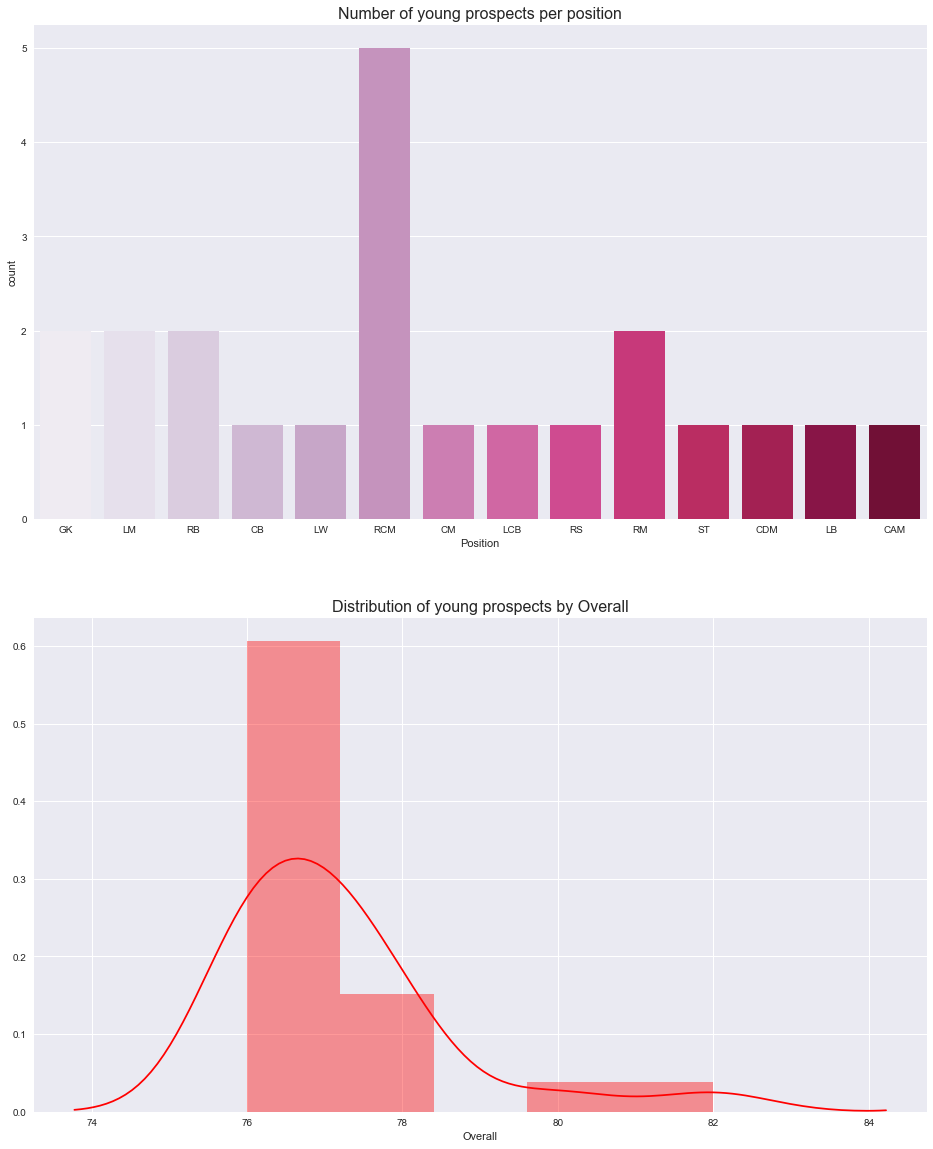

In [18]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(youth_special['Position'], palette="PuRd", ax=axs[0])
axs[0].set_title('Number of young prospects per position', fontsize=16)
sns.distplot(youth_special['Overall'],color="Red", ax=axs[1])
axs[1].set_title('Distribution of young prospects by Overall', fontsize=16)

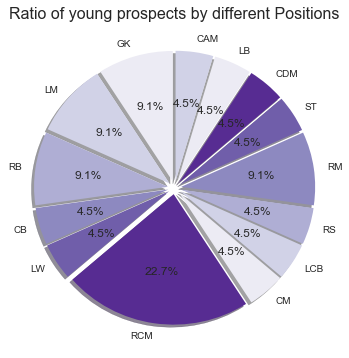

In [19]:
# Data to plot
GK = len(youth_special[youth_special['Position'] == 'GK'])
LM = len(youth_special[youth_special['Position'] == 'LM'])
RB = len(youth_special[youth_special['Position'] == 'RB'])
CB = len(youth_special[youth_special['Position'] == 'CB'])
LW = len(youth_special[youth_special['Position'] == 'LW'])
RCM = len(youth_special[youth_special['Position'] == 'RCM'])
CM = len(youth_special[youth_special['Position'] == 'CM'])
LCB = len(youth_special[youth_special['Position'] == 'LCB'])
RS = len(youth_special[youth_special['Position'] == 'RS'])
RM = len(youth_special[youth_special['Position'] == 'RM'])
ST = len(youth_special[youth_special['Position'] == 'ST'])
CDM = len(youth_special[youth_special['Position'] == 'CDM'])
LB = len(youth_special[youth_special['Position'] == 'LB'])
CAM = len(youth_special[youth_special['Position'] == 'CAM'])

labels = 'GK', 'LM', 'RB', 'CB', 'LW', 'RCM', 'CM', 'LCB', 'RS', 'RM', 'ST', 'CDM', 'LB', 'CAM'
sizes = [GK,LM,RB,CB,LW,RCM,CM,LCB,RS,RM,ST,CDM,LB,CAM]
plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)
sns.set_context("paper", font_scale=1.2)
plt.title('Ratio of young prospects by different Positions', fontsize=16)
plt.show()

**FEW THINGS TO REMEMBER**

I noticed a few patterns in the data present in the FIFA 19 dataset and this may prove to be very handy for players. One such pattern is the relationship between Overall Rating and Age.

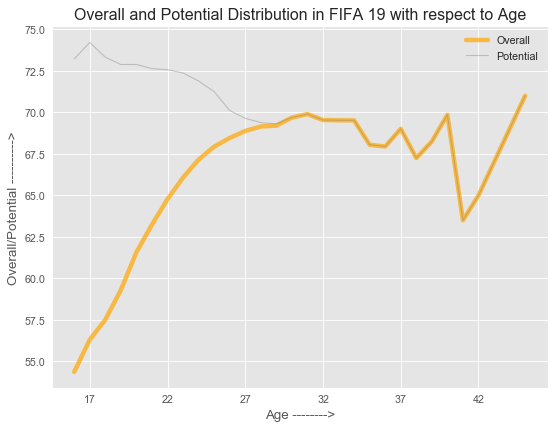

In [20]:
overall = players_df.groupby(['Age']).mean()
overall_list = list(overall.loc[:,"Overall"])
potential_list = list(overall.loc[:,"Potential"])
age = list(players_df.loc[:,"Age"].unique())
age = sorted(age)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.xticks([17,22,27,32,37,42])
    plt.plot(age,overall_list,color='orange', linewidth=4, alpha=0.7, label='Overall')
    plt.plot(age,potential_list, color='grey', linewidth=1, alpha=0.4, label='Potential')
    plt.legend(loc='upper right')
    plt.xlabel("Age -------->")
    plt.ylabel("Overall/Potential ---------->")
    plt.title("Overall and Potential Distribution in FIFA 19 with respect to Age")
    plt.grid(b=None, which='major', axis='both', color='w')
    plt.show()

We notice that the overall of a player increases as he ages. This continues till about the age of 30 or 31 when the player is at his prime. Post 30, a player starts to decline in performance.
We also see that the actual overall and the potential of a player in FIFA 19 come to equal terms at about the age of 29. The potential of a player is a reflection of his overall rating if he reaches his prime.

Now, let us have a look at how age affects the valuation of a footballer.

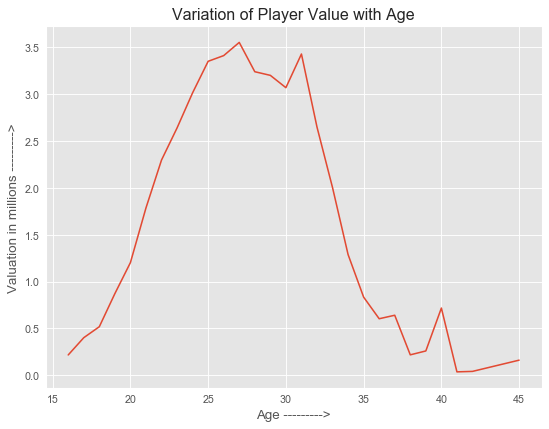

In [21]:
valuation = players_df.groupby(['Age']).mean()
valuation_list = list(valuation.loc[:,'Value'])
age = list(players_df.loc[:,'Age'].unique())
age = sorted(age)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.plot(age,valuation_list)
    plt.title("Variation of Player Value with Age")
    plt.xlabel("Age --------->")
    plt.ylabel("Valuation in millions --------->")
    plt.show()

Unsurprisingly, the value of a player also increases with age and reaches a maximum at around the age of 31. After 31, the value of a player starts dwindling and hence it is important for future FIFA 19 managers to note this. 
The relationship between player wages and age also follows a similar pattern as depicted below:

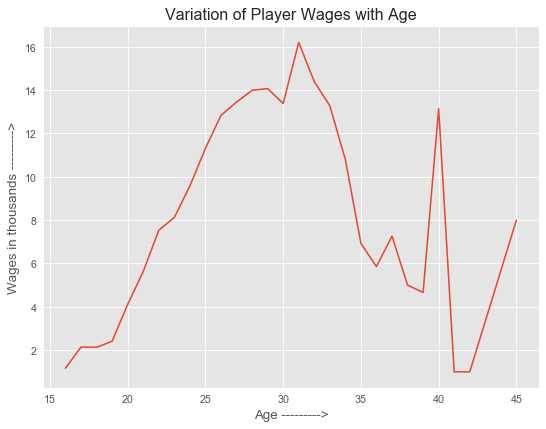

In [22]:
wages = players_df.groupby(['Age']).mean()
wages_list = list(valuation.loc[:,'Wage'])
age = list(players_df.loc[:,'Age'].unique())
age = sorted(age)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.plot(age,wages_list)
    plt.title("Variation of Player Wages with Age")
    plt.xlabel("Age --------->")
    plt.ylabel("Wages in thousands --------->")
    plt.show()

Next up, we will have a look at how overall ratings affect the valuation of a footballer with the help of a scatter plot.

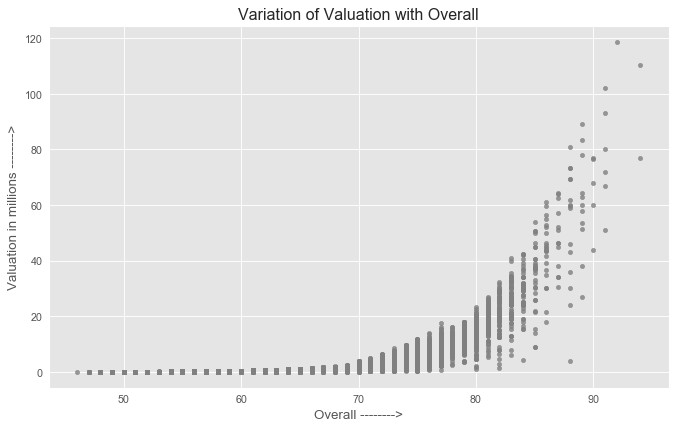

In [23]:
value_list = list(players_df.loc[:,'Value'])
overall = list(players_df.loc[:,'Overall'])
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.scatter(overall,value_list,s=15,alpha=0.8,c='grey')
    plt.xlabel('Overall -------->')
    plt.ylabel('Valuation in millions -------->')
    plt.title('Variation of Valuation with Overall')
    plt.show()

It is easily noticeable that the valuation of a footballer increases with his overall rating.

# 3. PLAYING MANAGER MODE

The Manager Mode of FIFA19 is one of the most popular features of the game among gamers. It puts a gamer on the managerial seat of his/her favourite football club. Different managers have different preferences when it comes to selecting the football club he/she will manage. Some players prefer to start off with a club having a young squad, thus having more scope of developing footballers. Here, we have a look at favourable clubs for these managers and the clubs he/she will stay away from. 

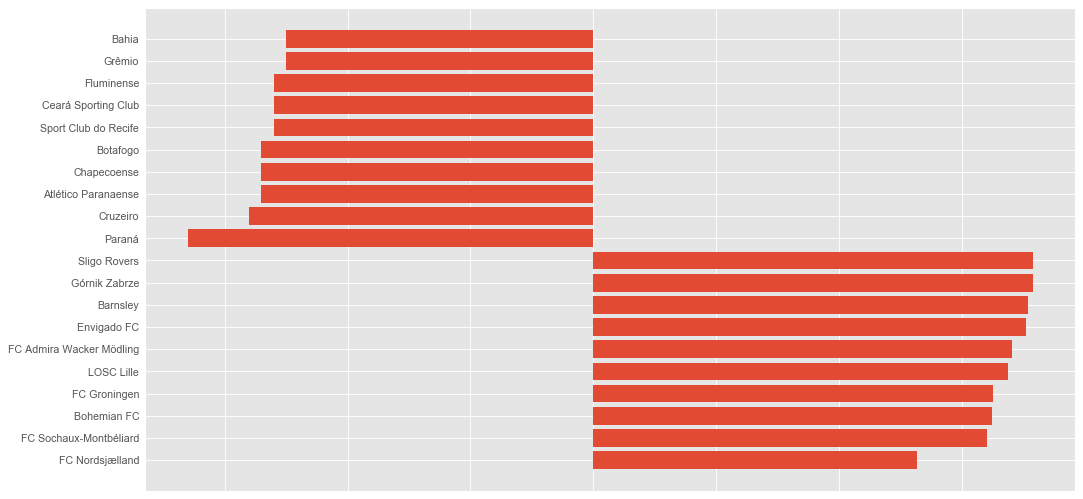

In [24]:
clubs_df = players_df.groupby('Club').mean()
clubs_df_youngest = clubs_df.sort_values(['Age'],ascending=True)
clubs_df_youngest = clubs_df_youngest['Age']
clubs_df_youngest = clubs_df_youngest[0:10]
clubs_df_eldest = clubs_df.sort_values(['Age'],ascending=False)
clubs_df_eldest = clubs_df_eldest['Age']
clubs_df_eldest = clubs_df_eldest[0:10]
clubs_youngest_eldest = pd.concat([clubs_df_youngest, clubs_df_eldest])
clubs_youngest_plot = list(clubs_df_youngest)
clubs_youngest_plot[:] = [age - 15 for age in clubs_youngest_plot]
clubs_eldest_plot = list(clubs_df_eldest)
clubs_eldest_plot[:] = [age - 25 for age in clubs_eldest_plot]
clubs_eldest_plot[:] = [-age for age in clubs_eldest_plot]
clubs_plot = clubs_youngest_plot + clubs_eldest_plot
youngest_eldest_clubs = list(clubs_youngest_eldest.index.values)
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(youngest_eldest_clubs, clubs_plot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    clubs_youngest_eldest = list(clubs_youngest_eldest)
    plt.show()

FC Nordsjaelland of Denmark has the youngest squad in FIFA 19, followed by FC Sochaux of France and Bohemian FC of Ireland. In general, South American clubs have the oldest squads in the game with all of the 10 such clubs being from South America.

Some managers prefer to have the most talented players in their disposal. Hence, such managers will prefer managing clubs with the most talents. But how do we define a talent? Is it the number of superstars in a squad? Or does it mean having a higher average player OVR rating? 
In this section, we will try to answer both the above questions. If we define talent as a footballer having a rating of above 85, we get the following visualization.

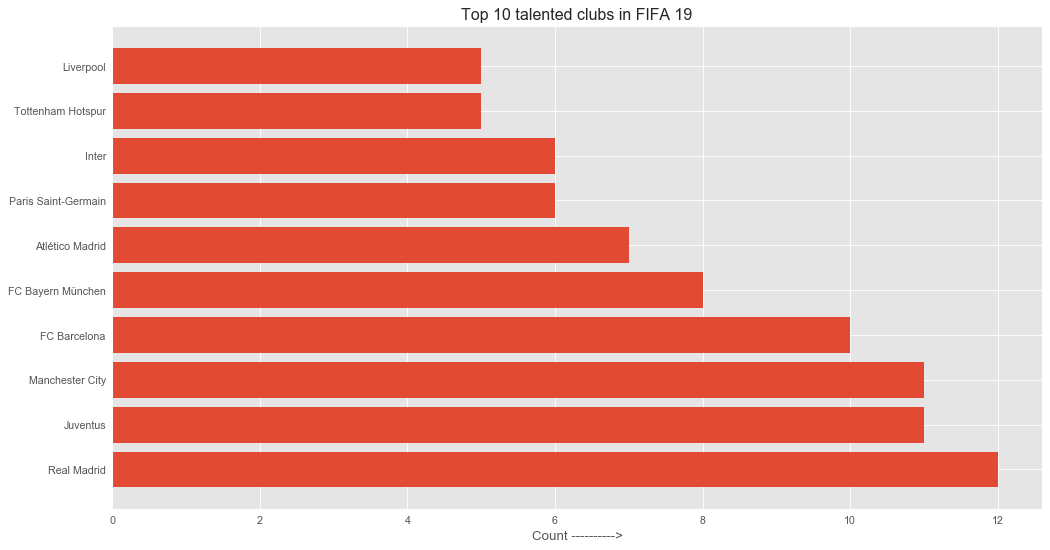

In [25]:
talents_df = players_df.filter(["Name", "Club", "Overall"])
talents_df = talents_df[talents_df.Overall >= 85]
talents_df = talents_df.groupby("Club").count()
talents_df = talents_df.sort_values(by=['Name'],ascending=False)
talents_df = talents_df[:10]
talents_clubs = list(talents_df.index.values)
talents_count = list(talents_df.iloc[:, 1])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(talents_clubs, talents_count)
    plt.title('Top 10 talented clubs in FIFA 19')
    plt.xlabel('Count ---------->')
    plt.show()

Spanish giant Real Madrid have the most footballers with an overall rating of above 85. They are followed by Juventus of Italy and Manchester City of England. The top 10 clubs include three each from Spain and England, followed by two from Italy (Juventus and Inter Milan). PSG and Bayern Munich make up the other two.

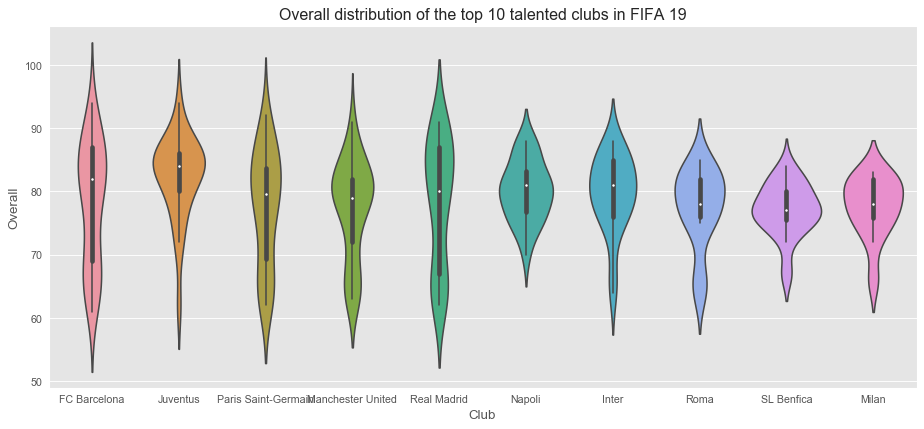

In [26]:
talented_df = players_df.filter(['Name', 'Club', 'Overall'])
talented_df = talented_df.groupby('Club').mean()
talented_df = talented_df.sort_values(by=['Overall'], ascending=False)
talented_df = talented_df[:10]
talented_clubs = talented_df.index.values
players_talented_clubs = players_df.filter(['Name','Club','Overall'])
players_talented_clubs = players_talented_clubs.loc[players_talented_clubs['Club'].isin(talented_clubs)]
players_talented_clubs
with plt.style.context('ggplot'):
    figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    sns.violinplot(x= players_talented_clubs['Club'], y=players_talented_clubs['Overall']).set_title('Overall distribution of the top 10 talented clubs in FIFA 19')

Now if we were to define the most talented club as the one having the maximum average player overall rating, then these are the top 10 clubs. We find that clubs like Napoli, Roma, Benfica and Milan have entered the mix here. It is interesting to note that four Italian clubs figure in this list. Serie A is known for having sturdy defenders and hence, managers to like to play attacking football may find managing one of these four clubs very interesting.

Managers also need to be aware of young starlets in the transfer market. Here, we look at the youngest players to have the most to gain in terms of achieving their potential. Most of these players come at a low fee and demand low wages to make life easier for the managers.

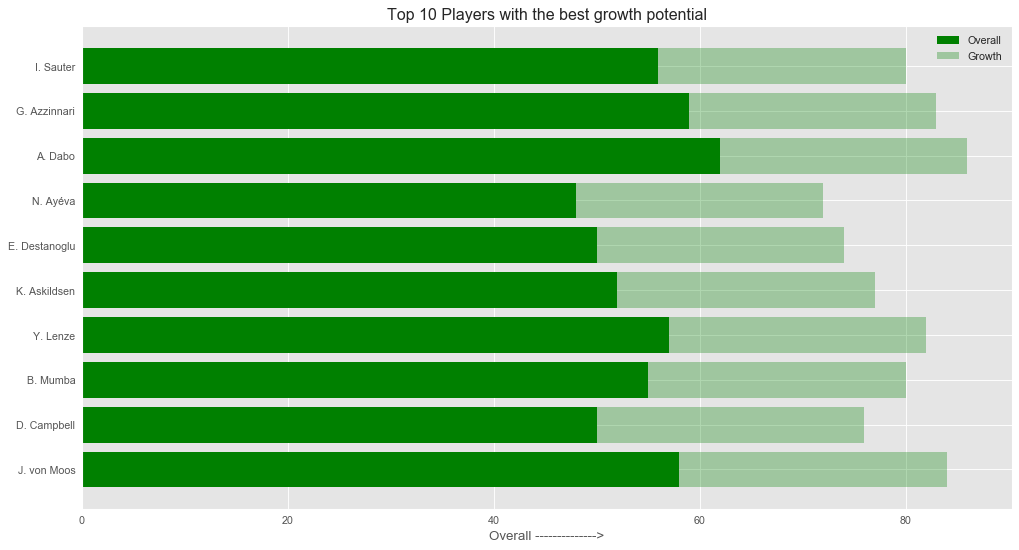

In [27]:
potential_df = players_df.filter(['Name','Age','Overall','Potential'])
potential_df['Growth'] = potential_df['Potential'] - potential_df['Overall']
potential_df = potential_df.sort_values(by=['Growth'],ascending=False)
potential_df = potential_df.iloc[:10]
players_list = list(potential_df.iloc[:, 0])
overall_list = list(potential_df.iloc[:,2])
growth_list = list(potential_df.iloc[:,4])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(players_list, overall_list, color='green', label='Overall')
    plt.barh(players_list, growth_list, left=overall_list, color='green', label='Growth', alpha=0.3)
    plt.legend()
    plt.title('Top 10 Players with the best growth potential')
    plt.xlabel('Overall -------------->')
    plt.show()

We notice that A.Dabo has the maximum potential. Dabo currently has an OVR of just over 60 and has the potential to reach around 92-93. He is closely followed by Y.Lenze and J.von Moos. Managers will surely love to keep an eye on these players.

Some managers like to manage clubs with the maximum valuation. This allows them to sell some of the existing players of the club in order to make money for buying players which best fit their playing style. Here are the 10 most valuable clubs in the game.

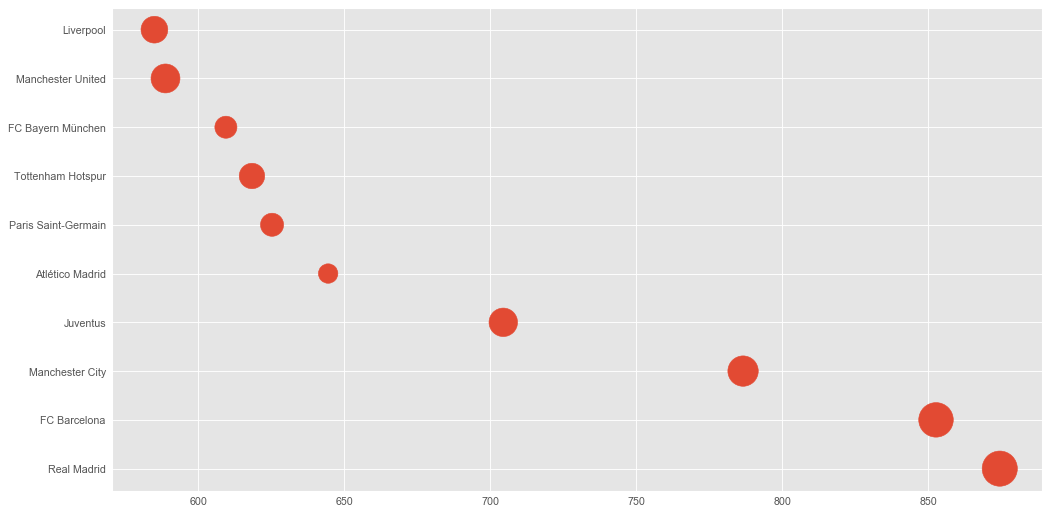

In [28]:
valuation_df = players_df.filter(['Name','Club','Value','Wage'])
valuation_df = valuation_df.groupby('Club').sum()
valuation_df = valuation_df.sort_values(by=['Value'], ascending=False)
valuation_df = valuation_df[:10]
clubs_list = list(valuation_df.index.values)
value_list = list(valuation_df.iloc[:, 0])
wage_list = list(valuation_df.iloc[:, 1])
alpha_list = wage_list
wage_list[:] = [wages / 5 for wages in wage_list]
#alpha_list[:] = [alpha/1004 for alpha in alpha_list]
rgba_colors = np.zeros((10,4))
rgba_colors[:,0] = 1.0
rgba_colors[:, 3] = alpha_list
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.scatter(value_list, clubs_list, s = wage_list )
    plt.show()

Quite unsurprisingly, Spanish giants Real Madrid and FC Barcelona are the most valuable football clubs in the game. These clubs also pay the most wages to their footballers. It is interesting to note that although Manchester United are 10th in this list, they pay more wages than other clubs in the list like Bayern Munich, PSG and Juventus among others. Atletico Madrid are one of the most well managed clubs. Although they are the fifth most valuable club, they pay the lowest wages among these clubs.

## 3.a. Scouting Player for Best positions

This feature helps Managers to find/scout the best players for the respective positions in the filed. We Have Taken a Dataframe comprising the values of different field positions of the players.

In [29]:
df = pd.read_csv('./Data/data.csv')

In [30]:
positions = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB']

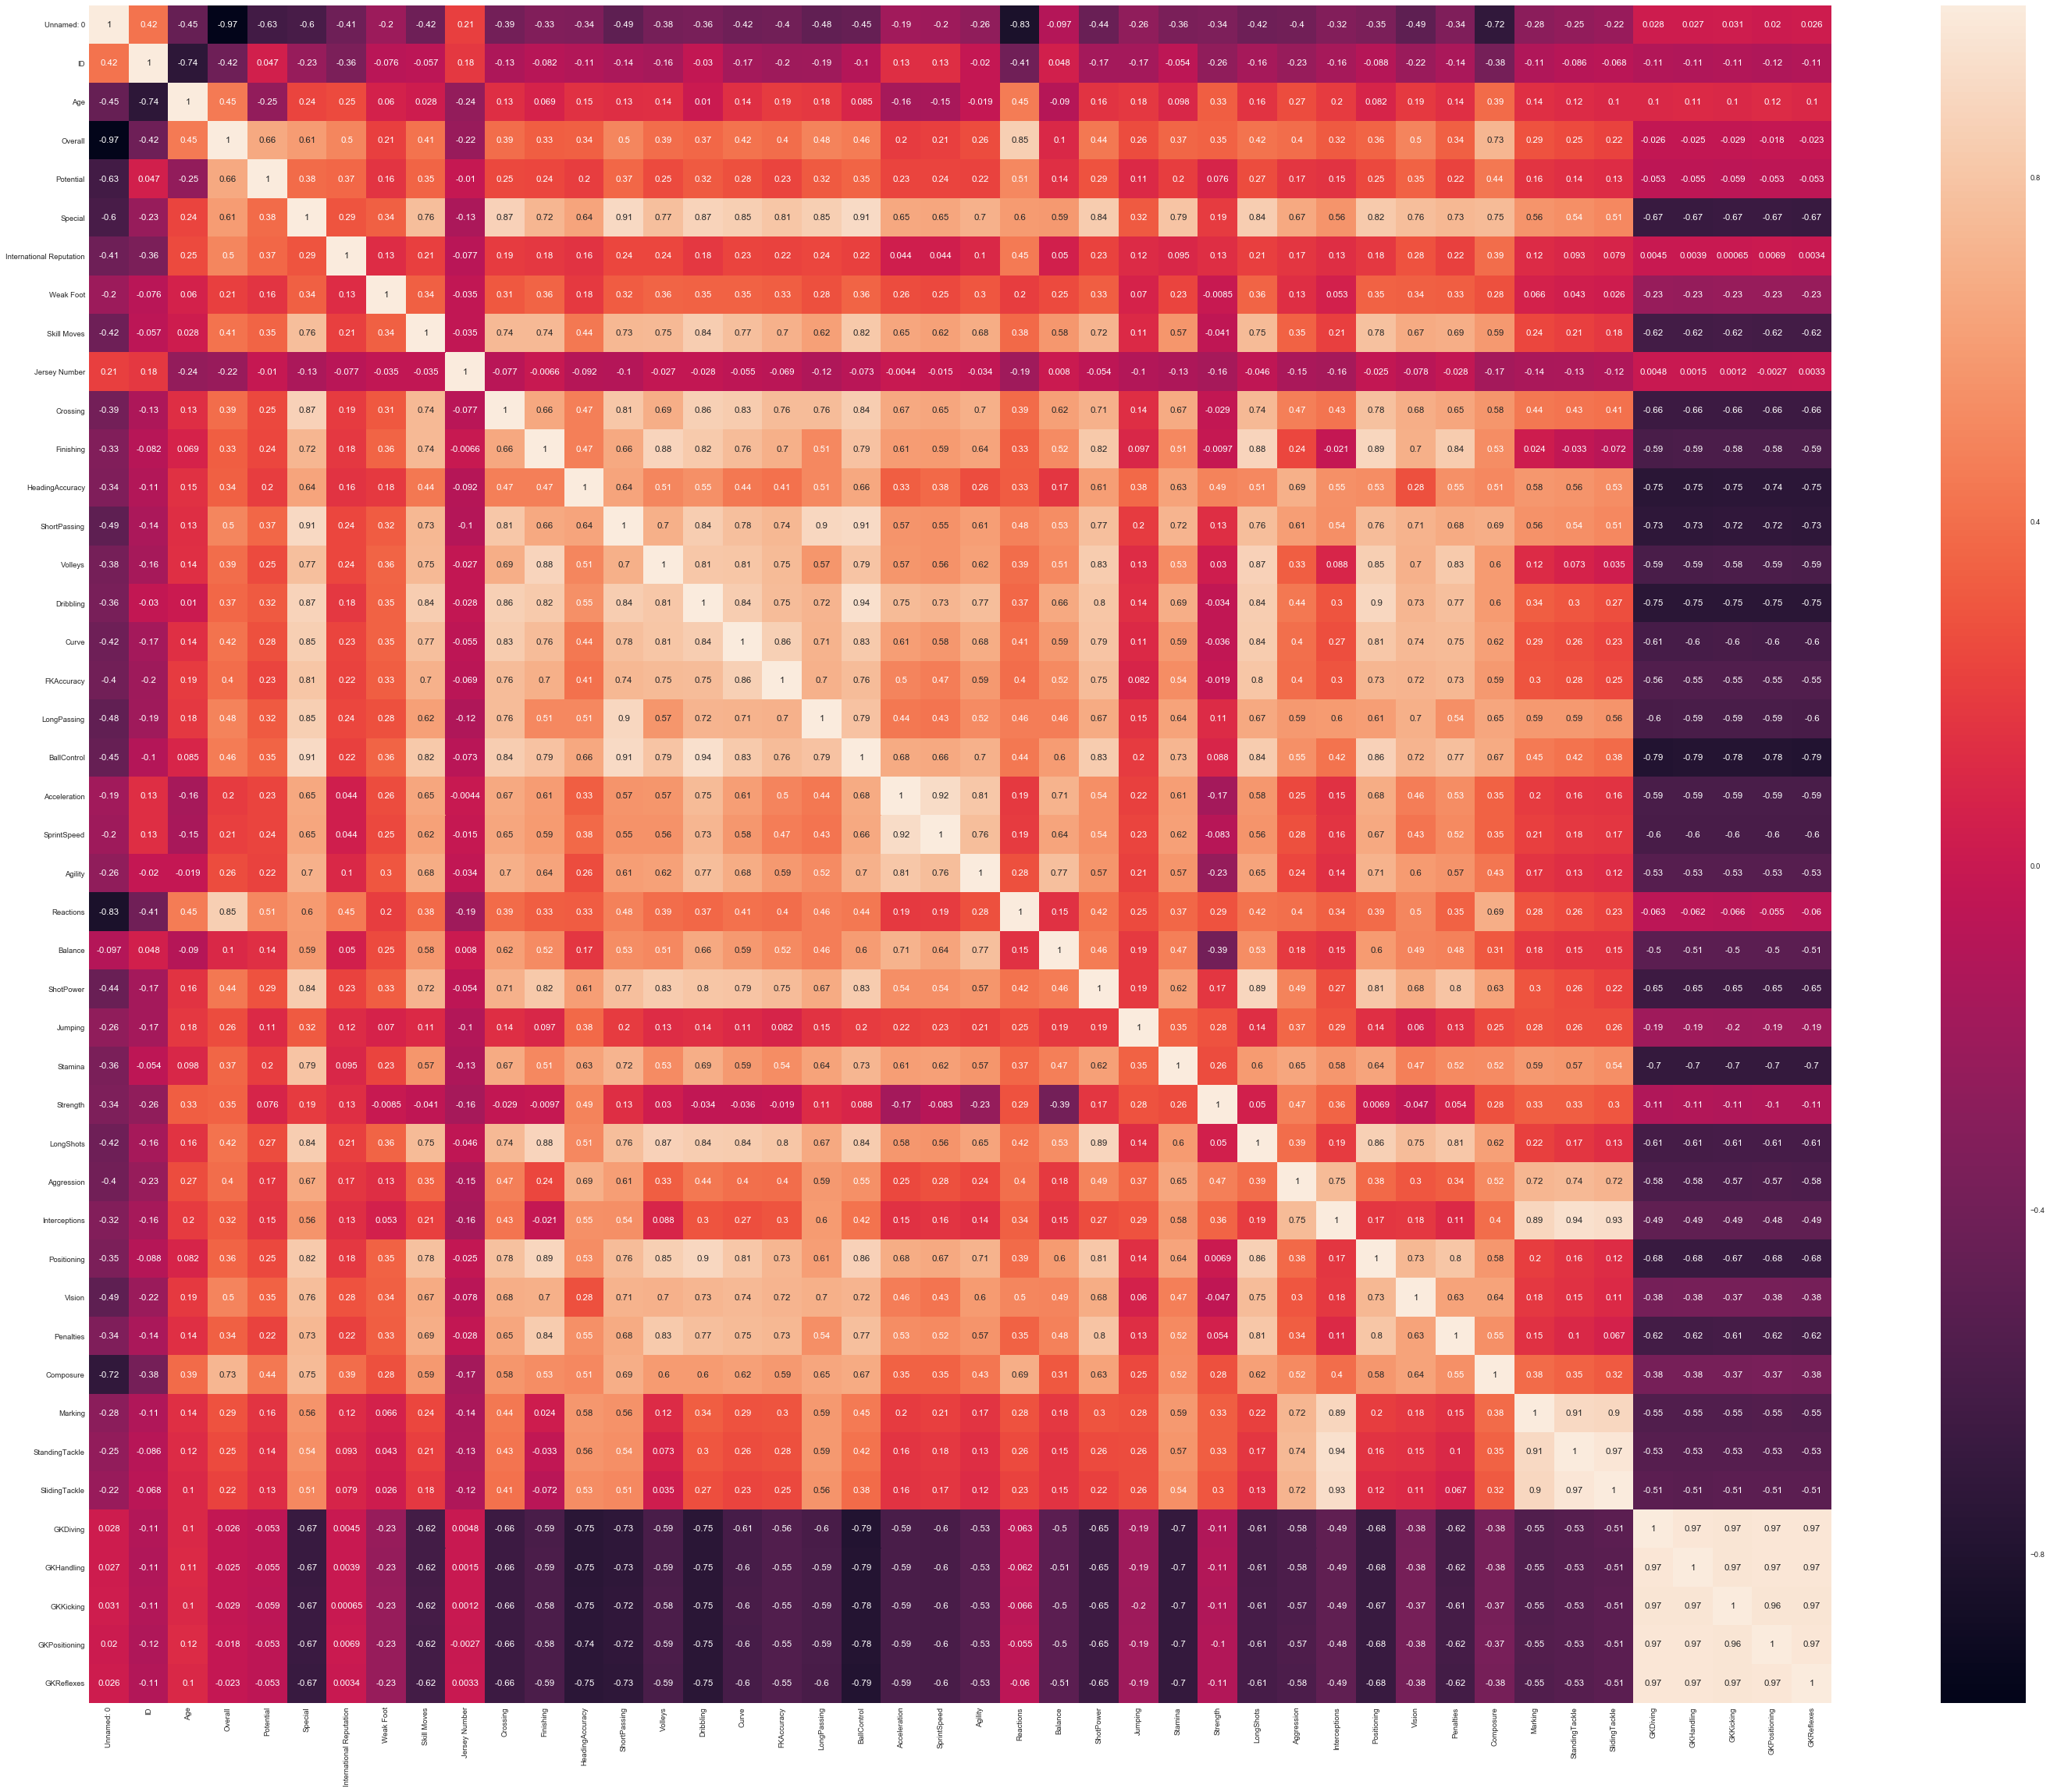

In [31]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(), annot=True)


In [32]:
#Categorizing positions into 3 main categories 1.Defenders  2.Midfielders  3.Attackers
pos_field = {'Def': re.findall(r"\wB|\w\wB",str([x for x in positions])),
            'Mid': re.findall(r"\wM|\w\wM",str([x for x in positions])),
            'Att': list(set(re.findall(r"\wS|\wF|\wW",str([x for x in positions]))))}

In [33]:
#User input for Top 10 players by position
inputs_good = 0
while inputs_good==0:
    user_input = input('Enter the position you want top players for: ')    
    #was trying to get user_input from user but faced difficulty when Kaggle runs the whole kernel
    #user_input = 'CAM' 
    input_list = user_input.split(',')

    search = []
    for i in input_list:
        search.append(i.strip().upper())
    inputs_good = all(elem in positions for elem in search)
    if inputs_good:
        print('User wants to search for Top 10: ', ", ".join(search))
    else:
        print('Invalid position. Please re-enter the position (e.g. RAM, CF, CDM)')

Enter the position you want top players for: rm
User wants to search for Top 10:  RM


In [34]:
for i in search:
    print('\n\n','Top 10', i, 'in FIFA 19', '\n')
    print(df.sort_values(i, ascending=False).head(10)[['Name', 'Nationality', 'Club', 'Overall']])



 Top 10 RM in FIFA 19 

                 Name Nationality                 Club  Overall
0            L. Messi   Argentina         FC Barcelona       94
5           E. Hazard     Belgium              Chelsea       91
2           Neymar Jr      Brazil  Paris Saint-Germain       92
4        K. De Bruyne     Belgium      Manchester City       91
1   Cristiano Ronaldo    Portugal             Juventus       94
17       A. Griezmann      France      Atlético Madrid       89
6           L. Modrić     Croatia          Real Madrid       91
29         L. Insigne       Italy               Napoli       88
26           M. Salah       Egypt            Liverpool       88
25          K. Mbappé      France  Paris Saint-Germain       88


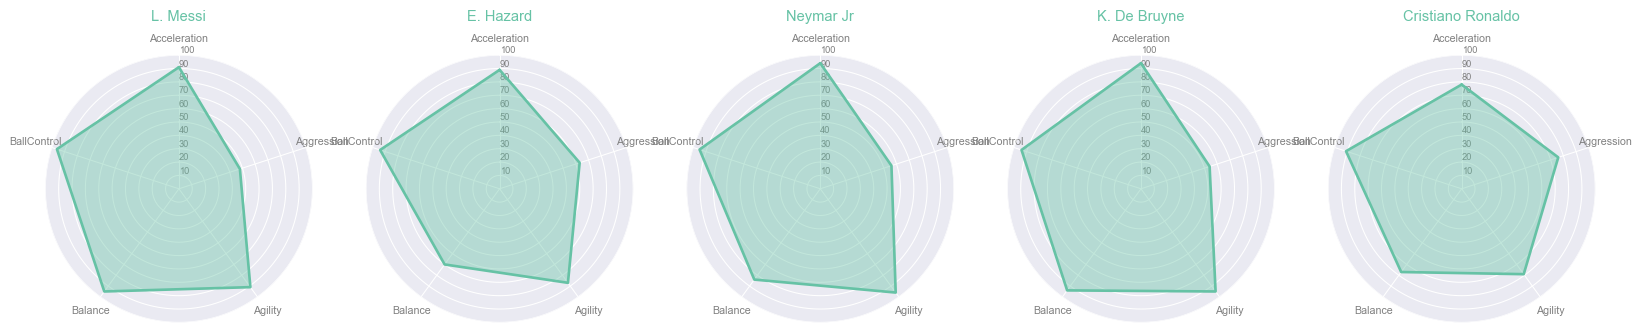

In [35]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, df, title, color):
    categories=list(df)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(1,5,row+1, polar=True )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80,90,100], ['10', '20', '30', '40', '50', '60', '70', "80","90","100"], color="grey", size=7)
    plt.ylim(0,100)
    
    # Ind1
    values=df.loc[row].drop('Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
plt.tight_layout()    

df0 = df.sort_values(by=search[0], ascending=False).head(5).reset_index()
df_spider = df0[['Name', 'Overall', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl']].sort_values(by='Overall', ascending=False).head(5).reset_index()
df_spider.drop(columns=['index', 'Overall'], axis=1, inplace=True)

for row in range(len(df_spider.index)):
    make_spider( row=row, df=df_spider, title=df0['Name'][row], color=my_palette(row))

## 3.b. Team Formation Analysis(FIFA 19 Dream Team)

Below is the team formation analysis of FIFA 19, this may help players playing in Manager Carreer to build the best possilbe team.

In [36]:
# Filtering the required Columns
data = players_df[['Name','Age','Overall','Potential','Club','Position','Value','Wage']]
data.head()

,Name,Age,Overall,Potential,Club,Position,Value,Wage
0,L. Messi,31,94,94,FC Barcelona,RF,110.5,565
1,Cristiano Ronaldo,33,94,94,Juventus,ST,77.0,405
2,Neymar Jr,26,92,93,Paris Saint-Germain,LW,118.5,290
3,De Gea,27,91,93,Manchester United,GK,72.0,260
4,K. De Bruyne,27,91,92,Manchester City,RCM,102.0,355


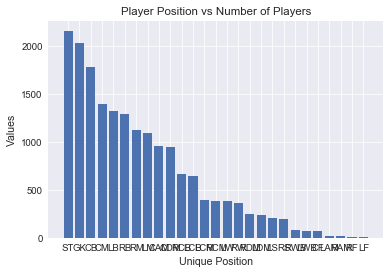

In [37]:
# Different Postions
x = df['Position'].value_counts().index
y = df['Position'].value_counts().values
plt.bar(x,y)
plt.title('Player Position vs Number of Players')
plt.xlabel('Unique Position')
plt.ylabel('Values')
plt.show()

### Formation : 4-2-1-3

In [38]:
pos = ['GK','RB','LB','RCB','LCB','RDM','LDM','LW','LS','RS','RW']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

         Age                 Club            Name Overall Potential  Value  \
Position                                                                     
GK        27    Manchester United          De Gea      91        93   72.0   
RB        28              Chelsea     Azpilicueta      86        86   35.0   
LB        30          Real Madrid         Marcelo      88        88   43.0   
RCB       32          Real Madrid    Sergio Ramos      91        91   51.0   
LCB       33             Juventus    G. Chiellini      89        89   27.0   
RDM       25    Manchester United        P. Pogba      87        91   64.0   
LDM       27              Chelsea        N. Kanté      89        90   63.0   
LW        26  Paris Saint-Germain       Neymar Jr      92        93  118.5   
LS        31  Paris Saint-Germain       E. Cavani      89        89   60.0   
RS        31         FC Barcelona       L. Suárez      91        91   80.0   
RW        23      Manchester City  Bernardo Silva      86       

### Formation : 4-2-4


In [39]:
pos = ['GK','RB','LB','RCB','LCB','RDM','LDM','LW','LS','RS','RW']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

         Age                 Club            Name Overall Potential  Value  \
Position                                                                     
GK        27    Manchester United          De Gea      91        93   72.0   
RB        28              Chelsea     Azpilicueta      86        86   35.0   
LB        30          Real Madrid         Marcelo      88        88   43.0   
RCB       32          Real Madrid    Sergio Ramos      91        91   51.0   
LCB       33             Juventus    G. Chiellini      89        89   27.0   
RDM       25    Manchester United        P. Pogba      87        91   64.0   
LDM       27              Chelsea        N. Kanté      89        90   63.0   
LW        26  Paris Saint-Germain       Neymar Jr      92        93  118.5   
LS        31  Paris Saint-Germain       E. Cavani      89        89   60.0   
RS        31         FC Barcelona       L. Suárez      91        91   80.0   
RW        23      Manchester City  Bernardo Silva      86       

### Formation : 4-3-3


In [40]:
pos = ['GK','RB','LB','RCB','LCB','RM','LM','CM','LW','RW','ST']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

         Age                 Club               Name Overall Potential  Value  \
Position                                                                        
GK        27    Manchester United             De Gea      91        93   72.0   
RB        28              Chelsea        Azpilicueta      86        86   35.0   
LB        30          Real Madrid            Marcelo      88        88   43.0   
RCB       32          Real Madrid       Sergio Ramos      91        91   51.0   
LCB       33             Juventus       G. Chiellini      89        89   27.0   
RM        19  Paris Saint-Germain          K. Mbappé      88        95   81.0   
LM        29              Arsenal      P. Aubameyang      88        88   59.0   
CM        27    FC Bayern München             Thiago      86        86   45.5   
LW        26  Paris Saint-Germain          Neymar Jr      92        93  118.5   
RW        23      Manchester City     Bernardo Silva      86        91   59.5   
ST        33             Juv

### Formation : 3-5-2

In [41]:
pos = ['GK','CB','LCB','RCB','LWB','RWB','RCM','LCM','CM','RF','LF']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value','Wage'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

                  Name Age Overall Potential                      Club  Value  \
Position                                                                        
GK              De Gea  27      91        93         Manchester United   72.0   
CB            D. Godín  32      90        90           Atlético Madrid   44.0   
LCB       G. Chiellini  33      89        89                  Juventus   27.0   
RCB       Sergio Ramos  32      91        91               Real Madrid   51.0   
LWB          N. Schulz  25      80        81       TSG 1899 Hoffenheim   14.5   
RWB          M. Ginter  24      80        82  Borussia Mönchengladbach   15.5   
RCM       K. De Bruyne  27      91        92           Manchester City  102.0   
LCM           T. Kroos  28      90        90               Real Madrid   76.5   
CM              Thiago  27      86        86         FC Bayern München   45.5   
RF            L. Messi  31      94        94              FC Barcelona  110.5   
LF           E. Hazard  27  

### Formation : 4-4-2 Diamond

In [42]:
pos = ['GK','RB','LB','RCB','LCB','CDM','RCM','LCM','CAM','RF','LF']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value','Wage'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

                     Name Age Overall Potential               Club  Value Wage
Position                                                                      
GK                 De Gea  27      91        93  Manchester United   72.0  260
RB            Azpilicueta  28      86        86            Chelsea   35.0  175
LB                Marcelo  30      88        88        Real Madrid   43.0  285
RCB          Sergio Ramos  32      91        91        Real Madrid   51.0  380
LCB          G. Chiellini  33      89        89           Juventus   27.0  215
CDM       Sergio Busquets  29      89        89       FC Barcelona   51.5  315
RCM          K. De Bruyne  27      91        92    Manchester City  102.0  355
LCM              T. Kroos  28      90        90        Real Madrid   76.5  355
CAM          A. Griezmann  27      89        90    Atlético Madrid   78.0  145
RF               L. Messi  31      94        94       FC Barcelona  110.5  565
LF              E. Hazard  27      91        91     

### Formation : 4-3-2-1

In [43]:
pos = ['GK','RB','LB','RCB','LCB','CM','RCM','LCM','RAM','LAM','ST']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value','Wage'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

                       Name Age Overall Potential               Club  Value  \
Position                                                                      
GK                   De Gea  27      91        93  Manchester United   72.0   
RB              Azpilicueta  28      86        86            Chelsea   35.0   
LB                  Marcelo  30      88        88        Real Madrid   43.0   
RCB            Sergio Ramos  32      91        91        Real Madrid   51.0   
LCB            G. Chiellini  33      89        89           Juventus   27.0   
CM                   Thiago  27      86        86  FC Bayern München   45.5   
RCM            K. De Bruyne  27      91        92    Manchester City  102.0   
LCM                T. Kroos  28      90        90        Real Madrid   76.5   
RAM             J. Cuadrado  30      84        84           Juventus   29.5   
LAM                D. Tadić  29      81        81               Ajax   17.5   
ST        Cristiano Ronaldo  33      94        94   

### Formation : 3-4-3

In [44]:
pos = ['GK','LCB','CB','RCB','LCM','RCM','RM','LM','RW','LW','ST']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value','Wage'])
for val in pos:
    mask = data['Position'] == val
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

                       Name Age Overall Potential                 Club  Value  \
Position                                                                        
GK                   De Gea  27      91        93    Manchester United   72.0   
LCB            G. Chiellini  33      89        89             Juventus   27.0   
CB                 D. Godín  32      90        90      Atlético Madrid   44.0   
RCB            Sergio Ramos  32      91        91          Real Madrid   51.0   
LCM                T. Kroos  28      90        90          Real Madrid   76.5   
RCM            K. De Bruyne  27      91        92      Manchester City  102.0   
RM                K. Mbappé  19      88        95  Paris Saint-Germain   81.0   
LM            P. Aubameyang  29      88        88              Arsenal   59.0   
RW           Bernardo Silva  23      86        91      Manchester City   59.5   
LW                Neymar Jr  26      92        93  Paris Saint-Germain  118.5   
ST        Cristiano Ronaldo 

### Formation : 3-4-3 [ Age <= 28]

In [45]:
pos = ['GK','LCB','CB','RCB','LCM','RCM','RM','LM','RW','LW','ST']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value','Wage'])
for val in pos:
    mask1 = data['Position'] == val
    mask2 = data['Age'] <= 28
    mask = mask1 & mask2
    temp = data[mask].nlargest(n = 1, columns = 'Overall')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

                    Name Age Overall Potential                 Club  Value  \
Position                                                                     
GK                De Gea  27      91        93    Manchester United   72.0   
LCB         K. Koulibaly  27      87        90               Napoli   51.0   
CB             S. Umtiti  24      87        92         FC Barcelona   57.0   
RCB            R. Varane  25      86        91          Real Madrid   50.0   
LCM             T. Kroos  28      90        90          Real Madrid   76.5   
RCM         K. De Bruyne  27      91        92      Manchester City  102.0   
RM             K. Mbappé  19      88        95  Paris Saint-Germain   81.0   
LM               S. Mané  26      86        87            Liverpool   52.0   
RW        Bernardo Silva  23      86        91      Manchester City   59.5   
LW             Neymar Jr  26      92        93  Paris Saint-Germain  118.5   
ST               H. Kane  24      89        91    Tottenham Hots

### Formation : 3-4-3 [Considering Maximum Potential and Age Below 28]

In [46]:
pos = ['GK','LCB','CB','RCB','LCM','RCM','RM','LM','RW','LW','ST']

team = pd.DataFrame(columns=['Name','Age','Overall','Potential','Club','Position','Value','Wage'])
for val in pos:
    mask1 = data['Position'] == val
    mask2 = data['Age'] <= 28
    mask = mask1 & mask2
    temp = data[mask].nlargest(n = 1, columns = 'Potential')
    team = pd.concat([team,temp])
    

team.set_index('Position',inplace = True)
print(team)
overall = team['Overall'].mean()
potential = team['Potential'].mean()
print("Overall : ",overall)
print("Potential : ",potential)

                   Name Age Overall Potential                 Club  Value Wage
Position                                                                      
GK               De Gea  27      91        93    Manchester United   72.0  260
LCB         M. Škriniar  23      85        92                Inter   46.5   82
CB            S. Umtiti  24      87        92         FC Barcelona   57.0  205
RCB           R. Varane  25      86        91          Real Madrid   50.0  210
LCM            T. Kroos  28      90        90          Real Madrid   76.5  355
RCM        K. De Bruyne  27      91        92      Manchester City  102.0  355
RM            K. Mbappé  19      88        95  Paris Saint-Germain   81.0  100
LM             H. Aouar  20      80        90   Olympique Lyonnais   23.5   51
RW        Marco Asensio  22      85        92          Real Madrid   54.0  215
LW            Neymar Jr  26      92        93  Paris Saint-Germain  118.5  290
ST        Gabriel Jesus  21      83        92      M

# 4. PREDICTING PLAYER VALUATION USING LINEAR REGRESSION


In [47]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(players_df.loc[players_df['Potential'].idxmax()][0]))
print('Maximum Overall Perforamnce : '+str(players_df.loc[players_df['Overall'].idxmax()][0]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [48]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],players_df.loc[players_df[pr_cols[i]].idxmax()][0]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [49]:
#Top earners
print('Most valued player : '+str(players_df.loc[players_df['Value'].idxmax()][0]))
print('Highest earner : '+str(players_df.loc[players_df['Wage'].idxmax()][0]))

Most valued player : Neymar Jr
Highest earner : L. Messi


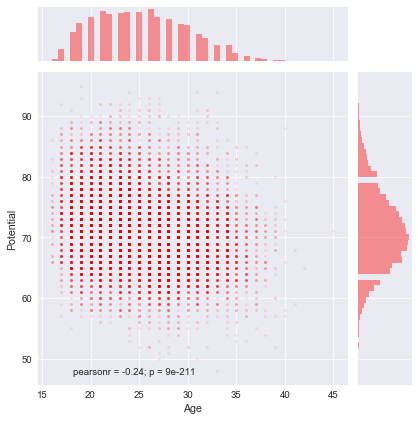

In [50]:
sns.jointplot(x=players_df['Age'],y=players_df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

#Potential tends to fall as you grow old

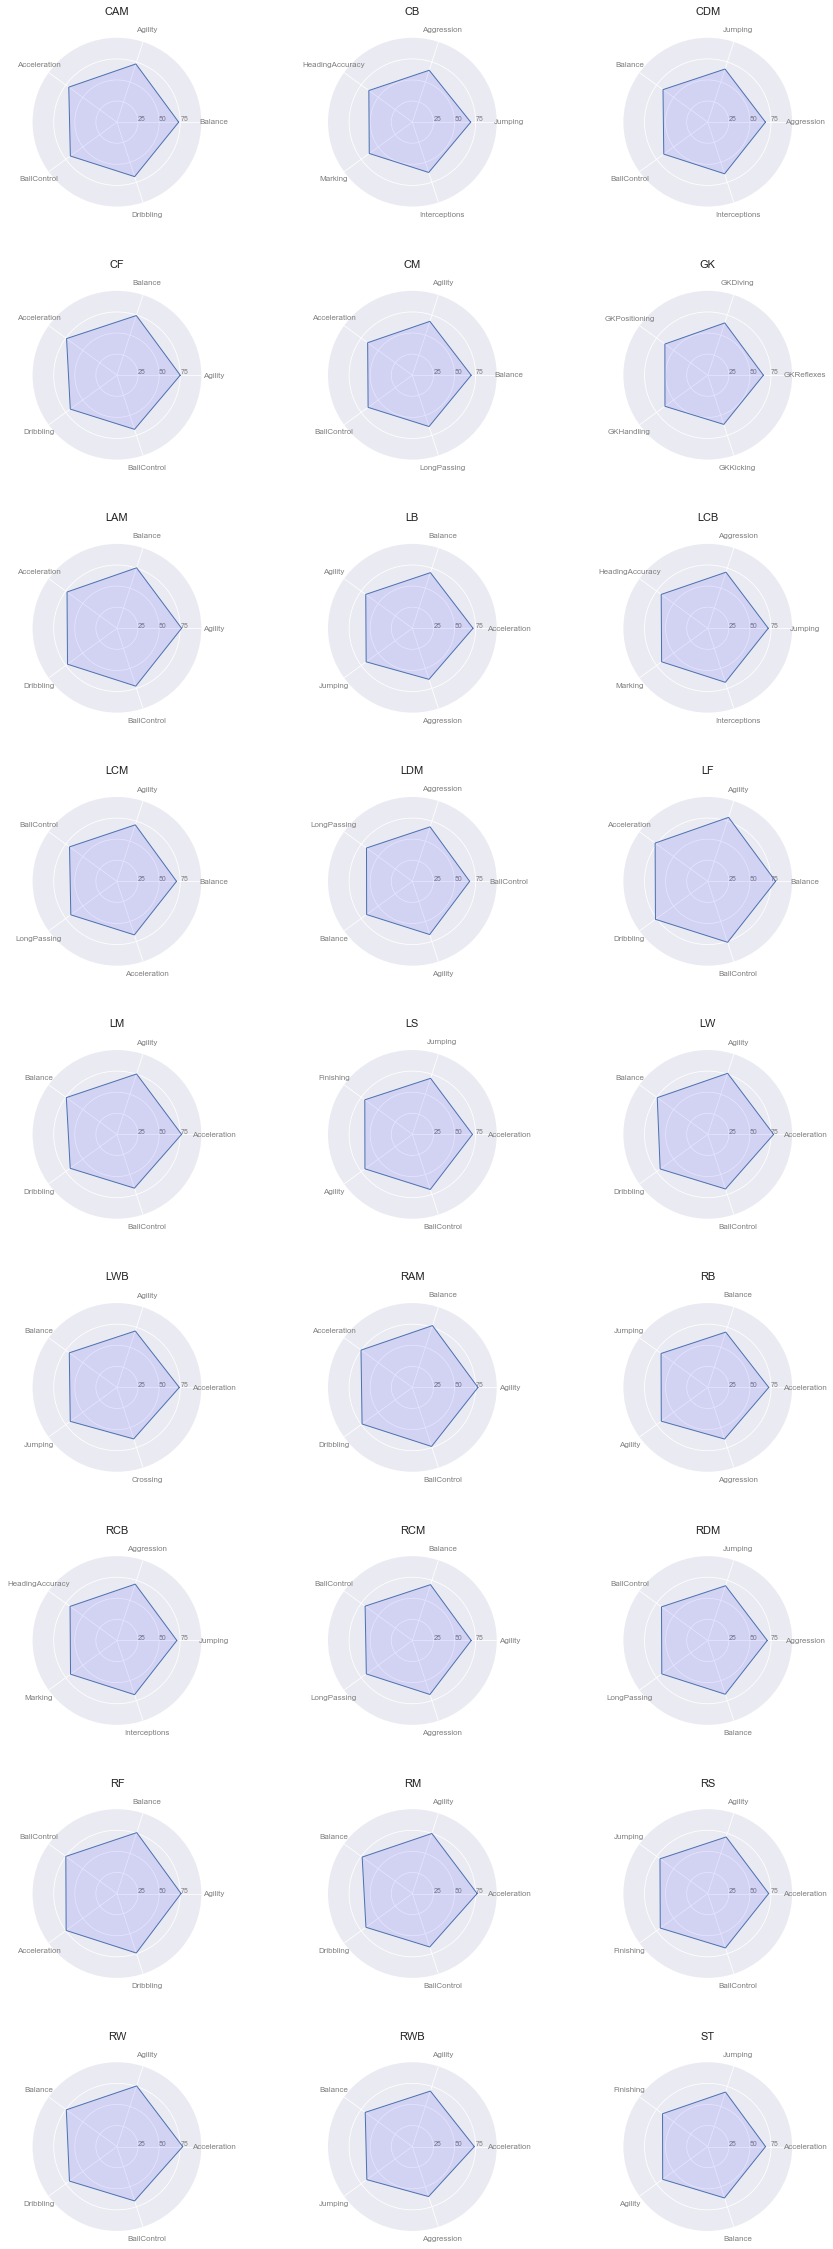

In [51]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in players_df.groupby(players_df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

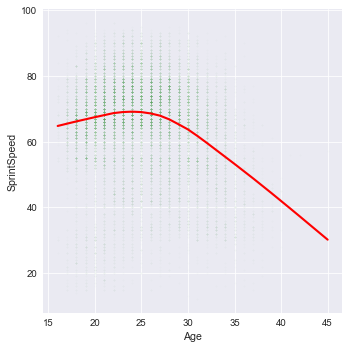

In [52]:
sns.lmplot(data = players_df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
#As the age increases the sprint speed decreases

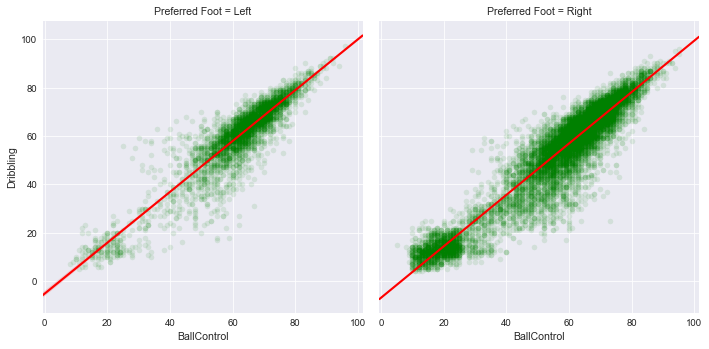

In [53]:
# Better is left-footed or rigth-footed players?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = players_df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'green'},
           line_kws={'color':'red'})

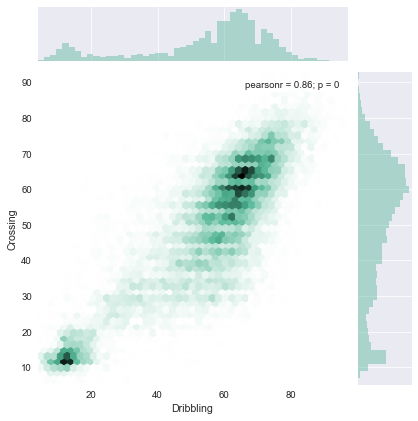

In [54]:
# Crossing vs. dribbling
sns.jointplot(x=players_df['Dribbling'], y=players_df['Crossing'], kind="hex", color="#4CB391")

### Modelling

In [55]:
df=players_df
df.columns

Index(['Name', 'Age', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [56]:
#Remove Unecessary columns
#drop_cols = df.columns[28:54]
#df = df.drop(drop_cols, axis = 1)
df = df.drop(['Flag','Jersey Number','Joined','Special', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,RF,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,ST,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,LW,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,GK,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,RCM,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [57]:
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Categorize Work Rate into integer values
def work_rate(df):
    if(df['WorkRate1'] =='Low' or df['WorkRate2']=='Low'):
        return 0
    elif(df['WorkRate1'] =='Medium' or df['WorkRate2']=='Medium'):
        return 1
    else:
        return 2
    
#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot', 'Position','Nationality'], axis = 1)
df1["WorkRate1"]=df1.apply(work_rate, axis=1)
df1["WorkRate2"]=df1.apply(work_rate, axis=1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,6.0,11.0,15.0,14.0,8.0,0,ST,1,1,1
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,7.0,11.0,15.0,14.0,11.0,1,ST,1,0,0
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,9.0,15.0,15.0,11.0,1,AM,1,1,1
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,90.0,85.0,87.0,88.0,94.0,1,GK,1,1,1
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,15.0,13.0,5.0,10.0,13.0,1,MF,0,2,2


In [58]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3329, 49) (13314, 49)
(3329,) (13314,)


In [59]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9292600815698705
RMSE : 1.8581453115566127


In [60]:
pca=PCA(n_components=45)
pca.fit(X_train)
print(pca.explained_variance_ratio_)


[5.71084131e-01 1.77919335e-01 5.77721315e-02 4.37324679e-02
 2.58532094e-02 1.19409896e-02 1.03809184e-02 8.27565514e-03
 7.94110600e-03 7.26033189e-03 7.12549992e-03 6.35931191e-03
 5.13788043e-03 4.87638399e-03 4.78314967e-03 4.66155567e-03
 4.22019022e-03 3.83825099e-03 3.77233925e-03 3.70624853e-03
 3.45056600e-03 3.22057900e-03 3.01547092e-03 2.97005891e-03
 2.57853733e-03 2.29588335e-03 2.12930738e-03 1.58683066e-03
 1.55780770e-03 1.08795576e-03 1.06241797e-03 1.05822503e-03
 9.55961805e-04 8.85675147e-04 8.64321839e-04 4.68220486e-04
 3.78632736e-05 2.92677740e-05 1.76686525e-05 1.69784682e-05
 1.59072976e-05 1.44184680e-05 1.12540146e-05 8.96434751e-06
 7.83366883e-06]


From above Principal Component Analysis we observed that Overall , Age and Reactions are the most important factor defining a player's characteristics.


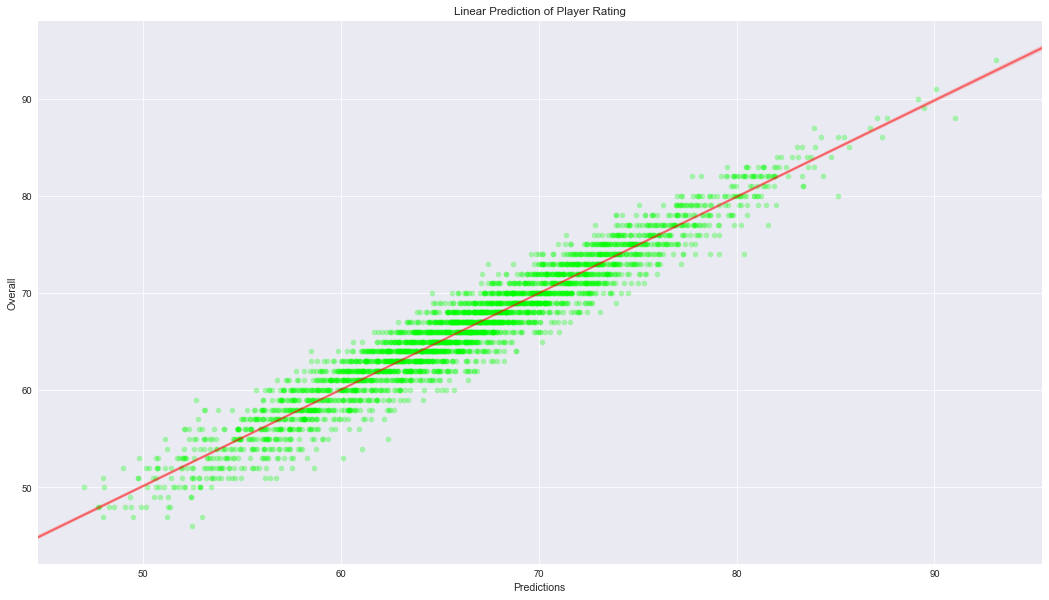

In [61]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

# 5. PREDICTING PLAYER VALUATION USING RANDOM FOREST REGRESSION

We will now use Random Forest Regression to predict the valuation of footballers using the overall rating and potential. Earlier, we have visualized the relation between player rating and player valuation. In the following visualization, we will see how potential varies with valuation. No prizes for guessing the result.

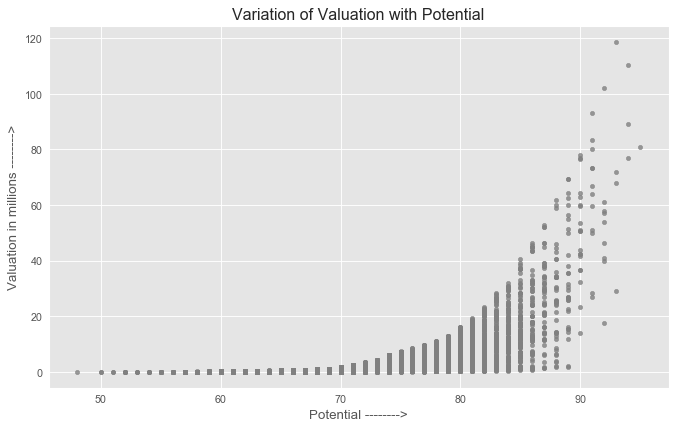

In [62]:
pot = list(players_df.iloc[:,5])
val = list(players_df.iloc[:,7])
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.scatter(pot,val,s=15,alpha=0.8,c='grey')
    plt.xlabel('Potential -------->')
    plt.ylabel('Valuation in millions -------->')
    plt.title('Variation of Valuation with Potential')
    plt.show()

Potential varies with player valuation in the same way that player overall rating varies with player valuation. We will now create the training and test sets for the machine learning model.

In [63]:
X = players_df.iloc[:,4:6]
y = players_df.iloc[:,7]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)
print('Training matrix of features shape: ', train_X.shape)
print('Training dependent variable shape: ', train_y.shape)
print('Test matrix of features shape: ', test_X.shape)
print('Test dependent variable shape: ', test_y.shape)

Training matrix of features shape:  (13314, 2)
Training dependent variable shape:  (13314,)
Test matrix of features shape:  (3329, 2)
Test dependent variable shape:  (3329,)


Our training set consists of 13314 records. We will train our model on this dataset and test it on the 3329 records present in the test set.

In [64]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(train_X, train_y)
predictions = regressor.predict(test_X)
errors = abs(predictions - test_y)
print('Mean absolute error: ',round(np.mean(errors),2) )
#Mean absolute Percentage error
mape = 100 * (errors/test_y)

#Calculating accuracy
acc = 100 - np.mean(mape)
print('Accuracy: ', round(acc,2), ' %')

Mean absolute error:  0.45
Accuracy:  74.94  %


We find that the model exhibits a MBE of 0.45 and accuracy of 74% which leaves a good scope for improvement. Most of the parameters used in our model are the default ones. The default parameters are not often the best parameters in a machine learning algorithm and hence leaves an area for improvement. First of all, let us have a look at the default parameters used by our Random Forest Algorithm.

In [65]:
print(regressor.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


The default hyperparameters does  not guarantee an optimal result for a problem. Hence, we will now apply the techniques of Hyperparameter Tuning to improve our model. In this respect, we will use Random Search Cross Validation to find an optimal model and improve accuracy.

In [66]:
n_estimators = [int(x) for x in np.linspace(start=200, stop= 2000, num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                                     n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
regressor_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [67]:
regressor_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

Here are the best hyperparameters as suggested by the Random Search Cross Validation algorithm. We notice that there are some significant differences from our earlier model.

In [68]:
predictions_random = regressor_random.predict(test_X)
errors = abs(predictions_random - test_y)
print('Mean absolute error: ',round(np.mean(errors),2) )
#Mean absolute Percentage error
mape = 100 * (errors/test_y)

#Calculating accuracy
acc = 100 - np.mean(mape)
print('Accuracy: ', round(acc,2), ' %')

Mean absolute error:  0.45
Accuracy:  75.01  %


The modified model gives us an accuracy of 75% which is a slight improvement from the previous accuracy. This may appear to be insignificant but depending on the business domain and the problem, this improvement may have massive altercations.



# 6. Predictions

In [69]:
players_df.columns
players_df.drop(['Nationality','Flag','Wage','Weak Foot', 'International Reputation', 'Jersey Number', 'Joined','Release Clause'], axis=1,inplace=True)
players_df.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Special',
       'Preferred Foot', 'Skill Moves', 'Work Rate', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

### 6.a. Selecting columns to find similarity among players

In [70]:
attributes = players_df.iloc[:, 14:]
attributes['Skill Moves'] = players_df['Skill Moves']
attributes['Age'] = players_df['Age']
workrate = players_df['Work Rate'].str.get_dummies(sep='/ ')
attributes = pd.concat([attributes, workrate], axis=1)
df = attributes
attributes = attributes.dropna()
df['Name'] = players_df['Name']
df['Position'] = players_df['Position']
df = df.dropna()
print(attributes.columns)

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Skill Moves',
       'Age', 'High', 'Low', 'Medium'],
      dtype='object')


### 6.b. Displaying our attribute set

In [71]:
attributes.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Skill Moves,Age,High,Low,Medium
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,6.0,11.0,15.0,14.0,8.0,4.0,31,0,0,1
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,7.0,11.0,15.0,14.0,11.0,5.0,33,1,1,0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,9.0,9.0,15.0,15.0,11.0,5.0,26,1,0,1
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,90.0,85.0,87.0,88.0,94.0,1.0,27,0,0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,15.0,13.0,5.0,10.0,13.0,4.0,27,1,0,0


### 6.c. Correlation Matrix based on attribute set

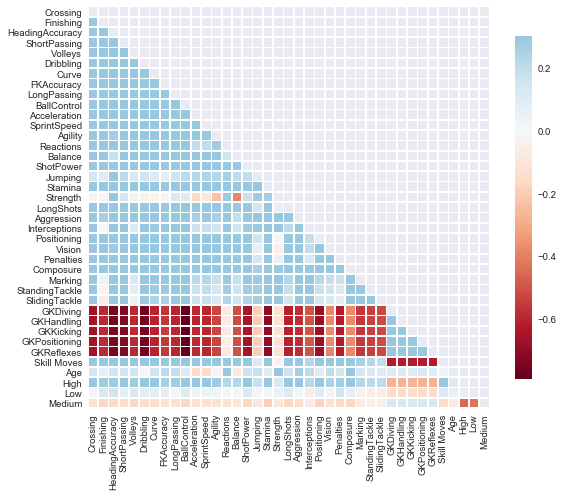

In [72]:
plt.figure(figsize=(9,9))

# Compute the correlation matrix
corr = attributes.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})

From the above correlation chart, we can see a lot of Goalkeepers attributes have a negative correlation with the attributes possessed by a Forward, Midfielder and Defender.

### 6.d. Standardize the dataset

In [73]:
scaled = StandardScaler()
X = scaled.fit_transform(attributes)

### 6.e. Create recommendations using NearestNeighbors ML

In [74]:
recommendations = NearestNeighbors(n_neighbors=5,algorithm='kd_tree')
recommendations.fit(X)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

### 6.f. Get Similar Players index

In [75]:
player_index = recommendations.kneighbors(X)[1]
player_index

array([[    0,     5,     2,    15,    66],
       [    1,   166,   121,   687,    17],
       [    2,     5,    63,    15,   154],
       ...,
       [16640, 16500, 15666, 16480, 16456],
       [16641, 16358, 16556, 15991, 16526],
       [16642, 16359, 16527, 16378, 16571]], dtype=int64)

### 6.g. Define a recommend function to display results

In [76]:
def get_index(x):
    return df[df['Name']==x].index.tolist()[0]

def recommend_similar(player):
    print("These are 4 players similar to {} : ".format(player))
    index=  get_index(player)
    for i in player_index[index][1:]:
        print("Name: {0}\nPosition: {1}\n".format(df.iloc[i]['Name'],df.iloc[i]['Position']))

**Test 1 : Eden Hazard**

In [77]:
recommend_similar('E. Hazard')

These are 4 players similar to E. Hazard : 
Name: Neymar Jr
Position: LW

Name: P. Dybala
Position: LF

Name: Ronaldo Cabrais
Position: RW

Name: Douglas Costa
Position: LM



**Test 2 : Mohamed Salah**

In [78]:
recommend_similar(player='M. Salah')

These are 4 players similar to M. Salah : 
Name: S. Mané
Position: LM

Name: Ronaldo Cabrais
Position: RW

Name: L. Sané
Position: LW

Name: Alex Teixeira
Position: LS



**Test 3 : Manuel Neuer**

In [79]:
recommend_similar('M. Neuer')

These are 4 players similar to M. Neuer : 
Name: De Gea
Position: GK

Name: J. Pickford
Position: GK

Name: K. Schmeichel
Position: GK

Name: B. Leno
Position: GK



**Test 4: Joe Gomez (Young Prospect)**

In [80]:
recommend_similar('J. Gomez')

These are 4 players similar to J. Gomez : 
Name: M. Škrtel
Position: LCB

Name: R. Shawcross
Position: RCB

Name: W. Orban
Position: RCB

Name: M. Nervo
Position: RCB

